# Unidad 1 Ejercicios.

Carga librerias

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

1. Elija una de las imágenes color que tomó para la clase y aplique separación de canales y elija un método para transformarla en escala de grises. Muestre por pantalla los resultados obtenidos. 

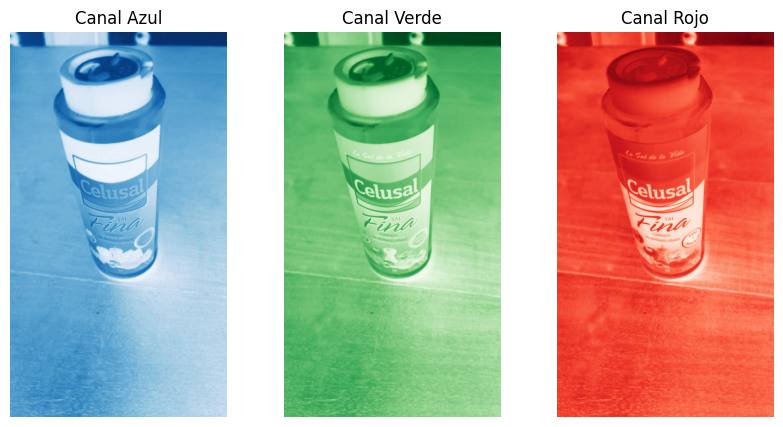

In [2]:
imagen = cv.imread('img1.jpeg')

# Convertir la imagen de BGR a RGB
imagen = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)

# Separar los canales de la imagen
R, G, B = imagen[:,:,0], imagen[:,:,1], imagen[:,:,2]

# Mostrar los canales por separado
# Mostrar los canales por separado
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(B, cmap='Blues')
plt.title('Canal Azul')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(G, cmap='Greens')
plt.title('Canal Verde')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(R, cmap='Reds')
plt.title('Canal Rojo')
plt.axis('off')

plt.show()


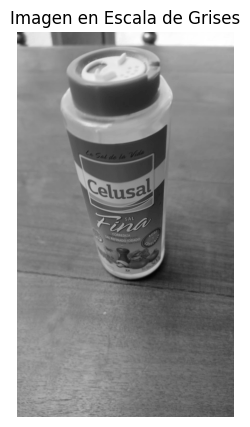

In [3]:
# Convertir la imagen a escala de grises
imagen_gris = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(5, 5))
plt.imshow(imagen_gris, cmap='gray')
plt.title('Imagen en Escala de Grises')
plt.axis('off')
plt.show()

2. Con las fotografías pedidas por la cátedra la clase pasada (la foto de objetos con fondo liso, y fotos del mismo producto en un contexto más complejo) usar los métodos de extracción de características (esos anteriores al Deep Learning) para encontrar la ubicación del producto dentro de la imagen. 

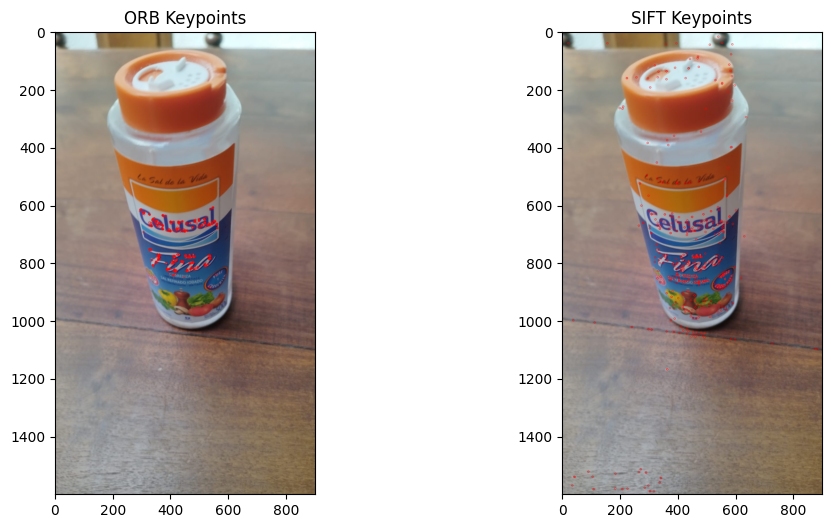

In [4]:
# Keypoints
# Cargar la imagen
image = cv.imread('img1.jpeg')  

# Convertir la imagen a RGB
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Inicializar ORB
orb = cv.ORB_create()
keypoints_orb = orb.detect(image, None)
image_with_orb_keypoints = cv.drawKeypoints(image_rgb, keypoints_orb, None, color=(255, 0, 0), flags=0)

# Inicializar SIFT
sift = cv.SIFT_create()
keypoints_sift = sift.detect(image, None)
image_with_sift_keypoints = cv.drawKeypoints(image_rgb, keypoints_sift, None, color=(255, 0, 0), flags=0)

# Usar matplotlib para mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_with_orb_keypoints)
plt.title('ORB Keypoints')

plt.subplot(1, 2, 2)
plt.imshow(image_with_sift_keypoints)
plt.title('SIFT Keypoints')

plt.show()

detectAndCompute

In [5]:
# Cargar las imágenes
image1 = cv.imread('img3.jpeg', cv.IMREAD_GRAYSCALE)  # Reemplaza con la ruta a tu imagen
image2 = cv.imread('img1.jpeg', cv.IMREAD_GRAYSCALE)  # Reemplaza con la ruta a otra imagen

# Inicializar ORB
orb = cv.ORB_create()

# Detectar keypoints y calcular descriptores
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Crear un objeto BFMatcher para encontrar las coincidencias
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Encontrar coincidencias
matches = bf.match(descriptors1, descriptors2)

# Ordenar las coincidencias en orden de distancia (cuanto más baja, mejor)
matches = sorted(matches, key=lambda x:x.distance)

# Dibujar las primeras 15 coincidencias
matched_img = cv.drawMatches(image1, keypoints1, image2, keypoints2, matches[:15], outImg=None, flags=2)

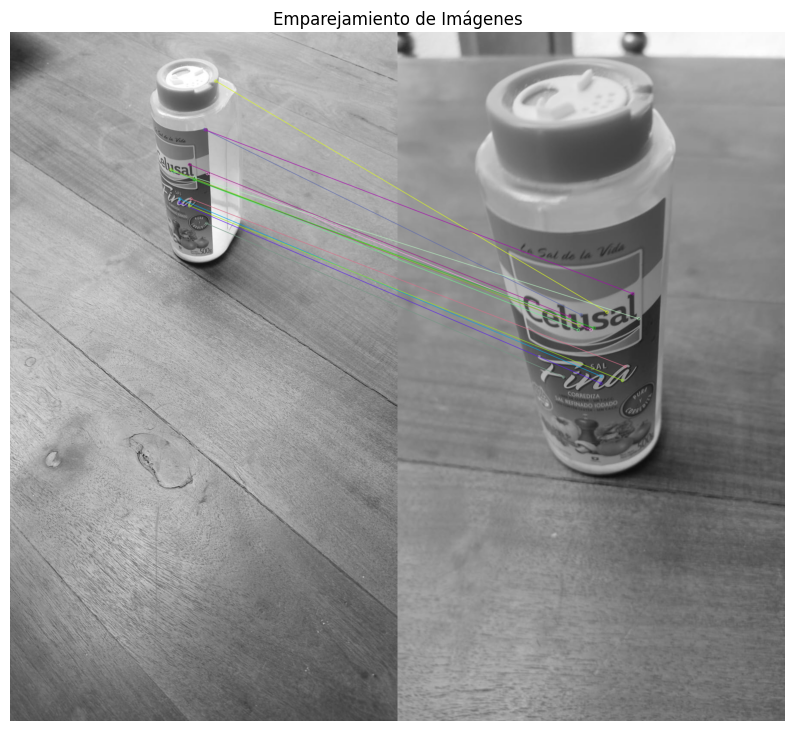

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(matched_img, cv.COLOR_BGR2RGB))
plt.title('Emparejamiento de Imágenes')
plt.axis('off')
plt.show()

método FLANN

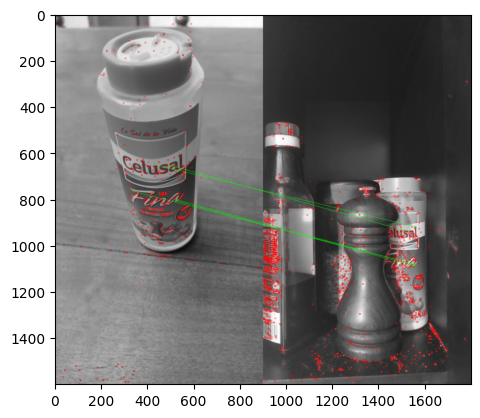

(<matplotlib.image.AxesImage at 0x24c89a09990>, None)

In [7]:
# Cargar imágenes en escala de grises
img1 = cv.imread('img1.jpeg', cv.IMREAD_GRAYSCALE)          # Imagen de consulta 
img2 = cv.imread('img4.jpeg', cv.IMREAD_GRAYSCALE) # Imagen de entrenamiento 

# Iniciar el detector SIFT
sift = cv.SIFT_create()

# Encontrar los keypoints y descriptores con SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Parámetros FLANN
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  

# Iniciar FLANN matcher
flann = cv.FlannBasedMatcher(index_params, search_params)

# Realizar emparejamientos kNN
matches = flann.knnMatch(des1, des2, k=2)

# Necesitamos dibujar solo los buenos emparejamientos, por lo que creamos una máscara
matchesMask = [[0, 0] for i in range(len(matches))]

# Test de proporción
for i, (m, n) in enumerate(matches):
    if m.distance < 0.55 * n.distance:
        matchesMask[i] = [1, 0]

# Parámetros de dibujo para los emparejamientos
draw_params = dict(matchColor=(0, 255, 0),  # color de los emparejamientos
                   singlePointColor=(255, 0, 0),  # color de los puntos individuales
                   matchesMask=matchesMask,  # máscara para seleccionar emparejamientos
                   flags=cv.DrawMatchesFlags_DEFAULT)

# Dibujar los emparejamientos kNN
img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)

# Mostrar la imagen resultante
plt.imshow(img3), plt.show()

# Motion Detection


Con los videos de youtube.com de cámara fija pedidos para esta clase, aplicar los algoritmos de detección de movimiento vistos en la teoría.

In [8]:
cap = cv.VideoCapture("motos.mp4")
backSub = cv.createBackgroundSubtractorMOG2(detectShadows=False)
while(1):
    ret, frame = cap.read()        
    fgMask = backSub.apply(frame)
        
    cv.imshow('original',frame)    
    cv.imshow('foregroundMask',fgMask)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


: 